In [68]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

In [2]:
#importing the dataset 28*28 pixel handwritten characters
mnist = tf.keras.datasets.mnist

## Dividing the  dataset into test and train dataset


In [3]:
#Unpacking the dataset in train and test

(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

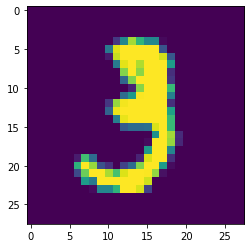

In [6]:
#Checking the sample data 

plt.imshow(x_train[10])
plt.show()

In [7]:
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

## Normalization

In [8]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

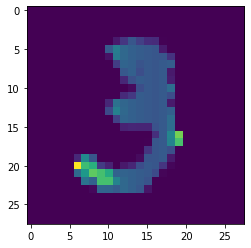

In [9]:
plt.imshow(x_train[10])

In [10]:
print(x_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## Resiging the image to apply the CNN

In [11]:
Image_size=28

x_trainN = np.array(x_train).reshape(-1,Image_size,Image_size,1) #increasing the dimension for the kernal operation
x_testN = np.array(x_test).reshape(-1,Image_size,Image_size,1) #increasing the dimension for the kernal opeartion


In [12]:
print("Training sample dimension", x_trainN.shape)

Training sample dimension (60000, 28, 28, 1)


In [13]:
print("Testing sample dimension", x_testN.shape)

Testing sample dimension (10000, 28, 28, 1)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [15]:
model = Sequential() #Neural network creation

In [16]:
#first CNN layer 28 -3+1 = 26
model.add(Conv2D(64, (3,3), input_shape = x_trainN.shape[1:])) # only for the first convulation layer to mention the input layer size
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2))) #Pooling

In [17]:
#Second Layer    26 -3+1 = 24 
model.add(Conv2D(64, (3,3))) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2))) #Pooling

#Third layer
model.add(Conv2D(64, (3,3)))  # 24 -3 +1 =22
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2))) #Pooling

In [18]:
#Fully conncected Layer

model.add(Flatten()) #flatten the layer from 2d to one 1D before using fully connected layer
model.add(Dense(64)) # all neuron are connected
model.add(Activation('relu')) 

#Fully connected second layer
model.add(Dense(32)) # all neuron are connected
model.add(Activation('relu')) 


#Last fully connected layer
model.add(Dense(10)) # all neuron are connected
model.add(Activation('softmax'))  #m  due to class probability the activation of the last layer is changed to softmax

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [20]:
#complie the model 

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [22]:
#Training the model
model.fit(x_trainN,y_train,epochs = 7, validation_split = 0.3) 

Epoch 1/7
1313/1313 [==============================] - 70s 52ms/step - loss: 0.3384 - accuracy: 0.8939 - val_loss: 0.1338 - val_accuracy: 0.9586
Epoch 2/7
1313/1313 [==============================] - 68s 51ms/step - loss: 0.1016 - accuracy: 0.9681 - val_loss: 0.1061 - val_accuracy: 0.9679
Epoch 3/7
1313/1313 [==============================] - 68s 52ms/step - loss: 0.0726 - accuracy: 0.9775 - val_loss: 0.0920 - val_accuracy: 0.9730
Epoch 4/7
1313/1313 [==============================] - 68s 52ms/step - loss: 0.0582 - accuracy: 0.9817 - val_loss: 0.0747 - val_accuracy: 0.9779
Epoch 5/7
1313/1313 [==============================] - 68s 52ms/step - loss: 0.0464 - accuracy: 0.9856 - val_loss: 0.0707 - val_accuracy: 0.9781
Epoch 6/7
1313/1313 [==============================] - 70s 54ms/step - loss: 0.0404 - accuracy: 0.9867 - val_loss: 0.0562 - val_accuracy: 0.9824
Epoch 7/7
1313/1313 [==============================] - 70s 53ms/step - loss: 0.0316 - accuracy: 0.9896 - val_loss: 0.0622 - val_ac

In [23]:
Test_loss,Test_acc = model.evaluate(x_testN,y_test)
print('Test_loss',Test_loss)
print('Test_acc',Test_acc)

313/313 [==============================] - 5s 17ms/step - loss: 0.0585 - accuracy: 0.9841
Test_loss 0.058457378298044205
Test_acc 0.9840999841690063


In [60]:
#Prediction

prediction = model.predict([x_testN])

In [61]:
print(prediction)

[[1.6023444e-08 3.2070081e-06 2.2055036e-07 ... 9.9999249e-01
  6.0313892e-09 4.0296654e-06]
 [9.9888093e-06 5.8617638e-07 9.9998903e-01 ... 2.1854358e-07
  3.9816676e-08 1.2837448e-07]
 [1.4654269e-07 9.9999952e-01 1.8487474e-09 ... 3.3892752e-07
  6.1124061e-09 4.2131241e-09]
 ...
 [7.6874937e-11 1.8256640e-06 8.8696758e-11 ... 2.2193636e-07
  1.2877803e-06 7.4565264e-07]
 [7.5296948e-06 3.0901817e-09 1.7591356e-08 ... 1.2251384e-08
  1.7993965e-06 3.0690157e-07]
 [2.1493992e-05 8.6098622e-09 6.1291792e-07 ... 1.3112607e-06
  5.0327031e-07 2.5636646e-07]]


In [66]:
print(np.argmax(prediction[1]))

2


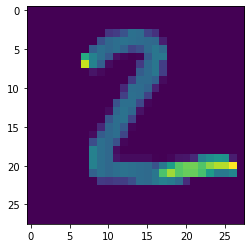

In [65]:
plt.imshow(x_test[1])

In [69]:
img = cv2.imread('seven.jpg')

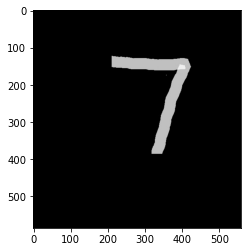

In [70]:
plt.imshow(img)

In [72]:
#convert color image to gray image

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [75]:
#Resize the image to 28*28

resized_image = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

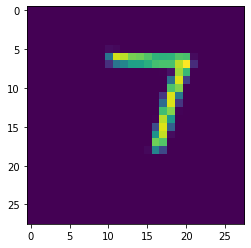

In [76]:
plt.imshow(resized_image)

In [79]:
newImg  = tf.keras.utils.normalize(resized_image, axis = 1)

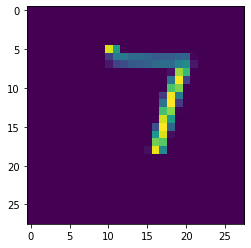

In [81]:
plt.imshow(newImg)

In [82]:
# for kernal operation of CNN we have to increase the dimension

newImg = np.array(newImg).reshape(-1,28,28,1)

In [83]:
newImg.shape

(1, 28, 28, 1)

In [84]:
ans =model.predict(newImg)

In [88]:
print(np.argmax(ans))#final answer

7
